In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns


C:\Users\AB92922\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [5]:
#pip install tensorflow==2.7.0

  Using cached tensorflow-2.7.0-cp39-cp39-win_amd64.whl (430.8 MB)
  Using cached flatbuffers-2.0.7-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0
    Uninstalling tensorflow-2.12.0:
      Successfully uninstalled tensorflow-2.12.0
  Rolling back uninstall of tensorflow
  Moving to c:\users\ab92922\anaconda3\lib\site-packages\tensorflow-2.12.0.dist-info\
   from C:\Users\AB92922\anaconda3\Lib\site-packages\~ensorflow-2.12.0.dist-info
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\AB92922\\anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [5]:
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [11]:
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

In [13]:
X_train/=255
X_test/=255


In [24]:
#create base neural networks

# Initialize the model
model = Sequential()

# Add a 2D convolutional layer with 28 filters, a kernel size of 3x3, and the specified input shape
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

# Add a max pooling layer with a pool size of 2x2 to reduce the spatial dimensions of the feature maps
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten the output from the convolutional layers to feed it into the fully connected layers
model.add(Flatten())

# Add a fully connected (Dense) layer with 128 neurons and ReLU activation function
model.add(Dense(128, activation=tf.nn.relu))

# Add a Dropout layer to prevent overfitting by randomly setting a fraction (0.2) of input units to 0
model.add(Dropout(0.2))

# Add the output layer with 10 neurons (assuming 10 classes) and softmax activation for classification
model.add(Dense(10, activation=tf.nn.softmax))


In [53]:
#compliling the model

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])


In [50]:
# Assuming X_val and y_val are your validation data
history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=10, 
    validation_data=(X_test, y_test)  # Add validation data here
)


Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0118 - accuracy: 0.9963 - val_loss: 0.0879 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0875 - val_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.1112 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0951 - val_accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.1043 - val_accuracy: 0.9851
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.1147 - val_accuracy: 0.9829
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.1134 -

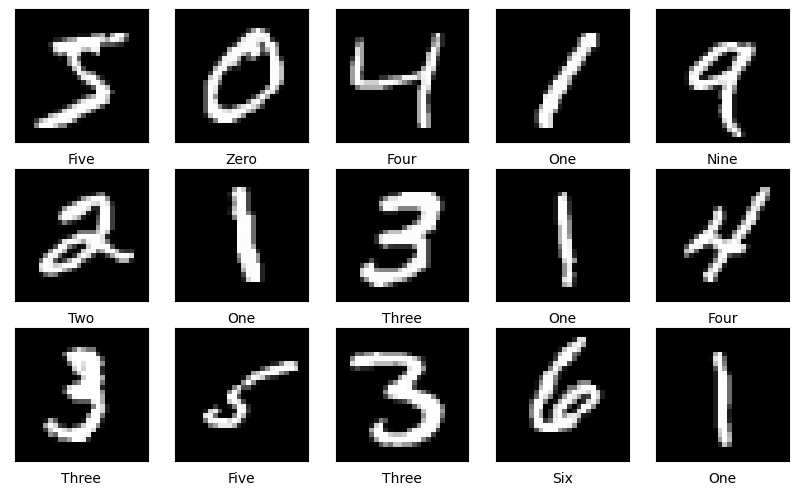

In [27]:
#name of numbers in the dataset in order

col_names  =  ['Zero','One', 'Two', 'Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap='gray')
    plt.xlabel(col_names[y_train[i]])
plt.show()

In [28]:
model

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                      

In [30]:
#predicting the labels digit

y_predict = model.predict(X_test)

In [31]:
y_predict

array([[3.0687130e-14, 1.9181005e-10, 4.3647148e-11, ..., 1.0000000e+00,
        2.6686194e-12, 2.8071601e-11],
       [3.3801723e-10, 3.4940686e-10, 1.0000000e+00, ..., 1.7314019e-22,
        4.4284893e-18, 3.7414082e-22],
       [1.1286295e-11, 9.9999988e-01, 2.0204971e-09, ..., 1.2724831e-08,
        2.8722051e-08, 1.8165855e-10],
       ...,
       [3.7344906e-23, 6.6684885e-13, 6.1659372e-19, ..., 2.6485469e-10,
        3.6303816e-10, 2.6585809e-08],
       [7.9974167e-16, 1.6202516e-13, 4.8859558e-19, ..., 7.7917396e-16,
        1.5536756e-06, 2.4063594e-15],
       [5.5543932e-13, 2.1352482e-23, 3.3505103e-14, ..., 3.4846286e-19,
        3.6750631e-16, 4.2436892e-18]], dtype=float32)

In [32]:
y_predict[1]

array([3.3801723e-10, 3.4940686e-10, 1.0000000e+00, 2.5687807e-16,
       4.2363152e-25, 1.1605190e-25, 1.3443739e-16, 1.7314019e-22,
       4.4284893e-18, 3.7414082e-22], dtype=float32)

In [35]:
y_predicts = np.argmax(y_predict,axis=1)
y_predicts

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [36]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [41]:
#confusion matrix for Mnist
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicts))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



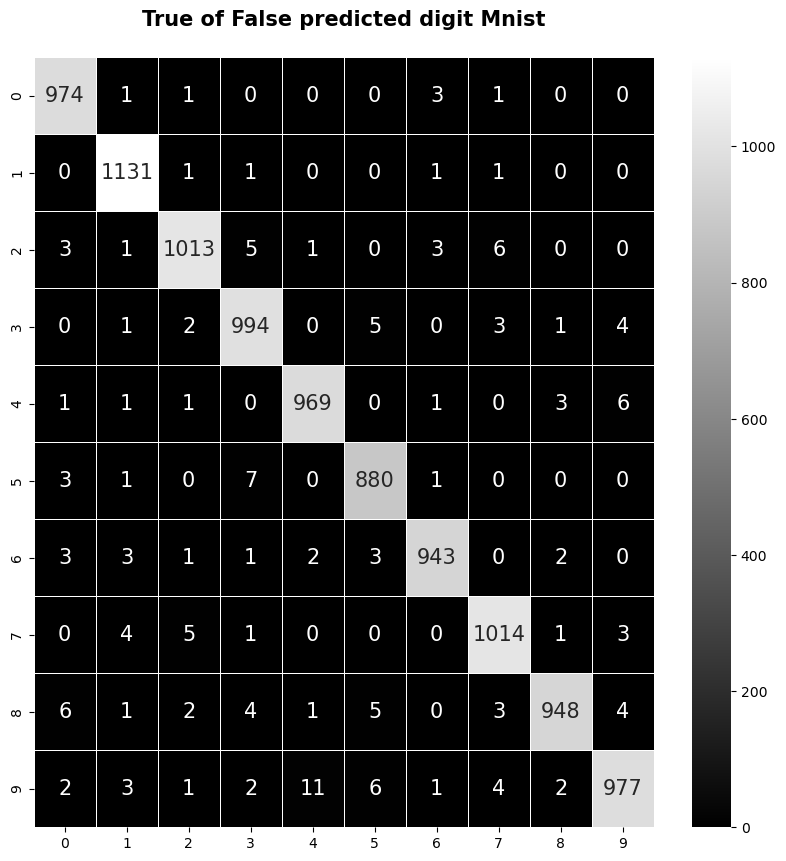

In [42]:
con_mat  = confusion_matrix(y_test, y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat, annot=True, annot_kws={'size':15}, linewidths=0.5, fmt='d', cmap="gray")
plt.title('True of False predicted digit Mnist\n',fontweight='bold', fontsize=15)
plt.show()

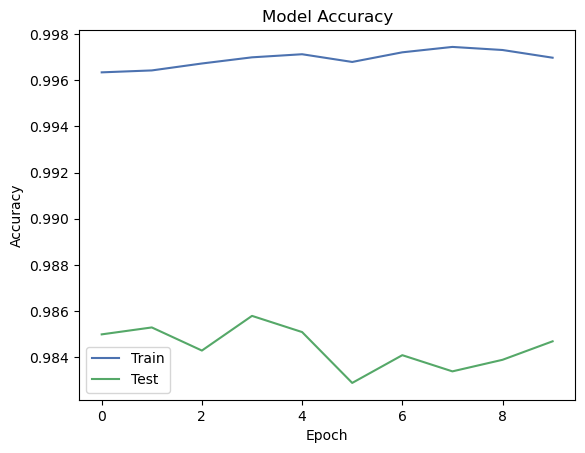

In [51]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'])

# Plot validation accuracy
plt.plot(history.history['val_accuracy'])

# Add a title to the plot
plt.title('Model Accuracy')

# Label the y-axis
plt.ylabel('Accuracy')

# Label the x-axis
plt.xlabel('Epoch')

# Add a legend to differentiate between training and validation accuracy
plt.legend(['Train', 'Test'], loc='best')

# Display the plot
plt.show()


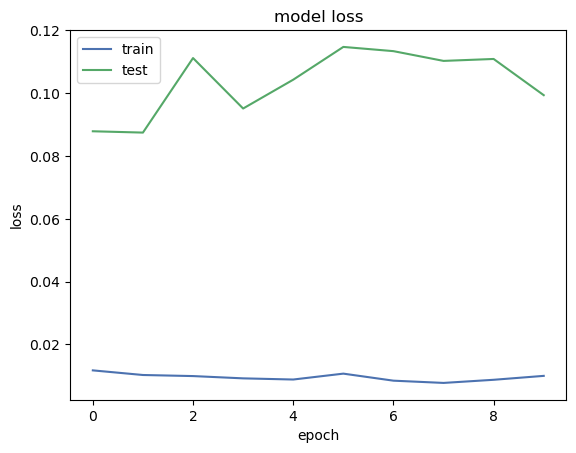

In [52]:
#summairse the loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()